# Laplacian Associative Memory (LAM) - DEV 10

[Multiscale representations of community structures in attractor neural networks](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8412329/pdf/pcbi.1009296.pdf) (2021)

- Gabor Filter pt2

In [1]:
from nn import LAM
import libtools

In [2]:
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# np.random.seed(123)

In [4]:
# Load SOM Angular Component Map
src = np.load('../data/mat/SOM_orient_v1.npy')
src = libtools.downsample(src, 1)
print(src.shape)

print('Theta θ | min:', round(src.min(),4), 'max:', round(src.max(),4))

(201, 201)
Theta θ | min: 0.0 max: 6.2832


---

### ANGULAR COMPONENT

In [11]:
# Load Sample Image
img = PIL.Image.open("../data/images/coco/forest_coco.png").convert('L')
img = np.array(img, dtype=float) / np.max(img)
print(img.shape)

(201, 201)


In [12]:
step = 20
f_size = 5

pad = int(step/2)
pad_im = np.pad(img, pad, mode='constant', constant_values=0)
features = np.zeros_like(pad_im)

for i in range(src.shape[0]):
    for j in range(src.shape[1]):
        x = src[i][j] - np.pi # Arc tangent | -π and π
        deg = np.rad2deg(x*0.5) # *0.5 to keep range between -90 and 90
        kernel = libtools.gabor_filter(2, 1, deg, samples=step, min=-f_size, max=f_size) # Orientation
        patch = pad_im[i:i+step, j:j+step]
        features[int(i+pad),int(j+pad)] = np.sum(patch * kernel) # Firing Rate / Response
        
features = features[pad:pad+src.shape[1],pad:pad+src.shape[1]]

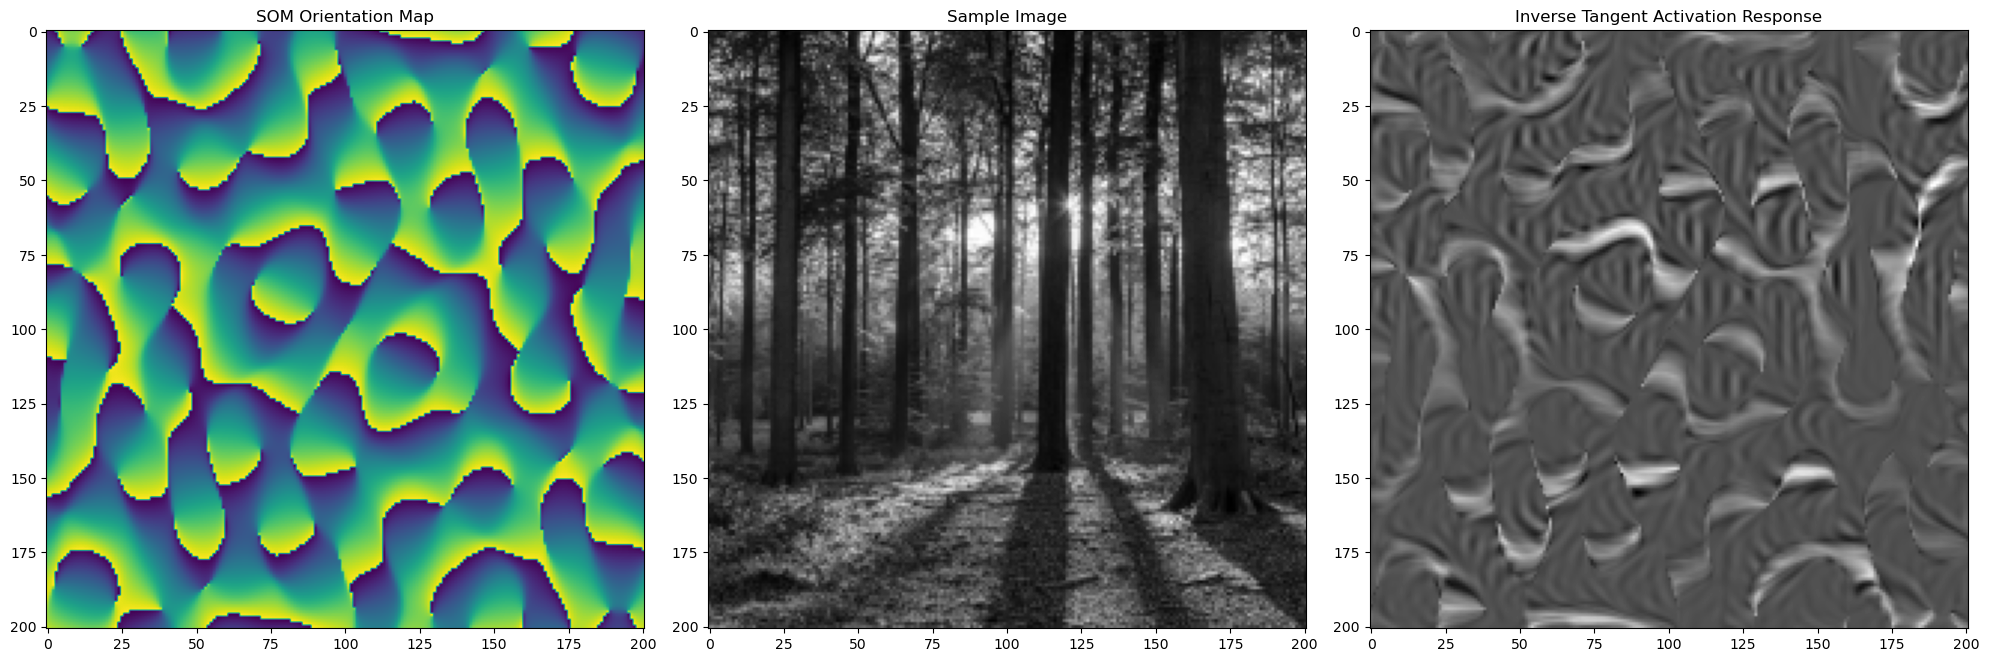

In [13]:
plt.figure(figsize=(20,60))
plt.subplot(1,3,1)
plt.imshow(src)
plt.title('SOM Orientation Map')

plt.subplot(1,3,2)
plt.imshow(img, 'gray')
plt.title('Sample Image')

plt.subplot(1,3,3)
plt.imshow(features, 'gray')
plt.title('Inverse Tangent Activation Response')

plt.tight_layout()